In [12]:
import nltk

import seaborn as sns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from nltk.stem import PorterStemmer
ps = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lm= WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))

from sklearn.linear_model import LogisticRegression

import lightgbm as lgb
classifier = lgb.LGBMClassifier()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

import spacy
nlp = spacy.load("fr_core_news_sm")

import numpy as np
import pandas as pd 

import tensorflow as tf

from gensim.utils import tokenize

from gensim.models import word2vec

import numpy as np

import re

In [13]:
df = pd.read_csv("./Notes_All.csv")

In [14]:
df.describe()

,ID,Note
count,6368.000000,6368.000000
mean,2.126413,3.818467
std,1.108758,1.511806
min,1.000000,0.500000
25%,1.000000,3.000000
50%,3.000000,4.500000
75%,3.000000,5.000000
max,4.000000,5.000000


In [15]:
df["Commentaire"] = df["Commentaire"].str.replace(r" +", " ")

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_5672\1340395864.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Commentaire"] = df["Commentaire"].str.replace(r" +", " ")


In [16]:
df = df[df.Commentaire != " "]

In [17]:
df.isnull().sum()

ID             0
User           0
Note           0
Commentaire    0
dtype: int64

In [18]:
df.head(10)

,ID,User,Note,Commentaire
0,1,Citrouilleman,5.0,"Wow. Excellent film d'action, bien mené de bo..."
1,1,benoitG80,4.0,Pas trop friand de ce genre de film vu en fam...
2,1,reymi586,5.0,Avatar est une vraie révolution ! Le film de ...
3,1,L'Otaku Sensei,5.0,Avatar...comment parler de ce film tout en re...
4,1,tony-76,5.0,"Vingt-cinq ans après Terminator, le réalisate..."
5,1,AV ciné,5.0,Un film extraordinaire !L'histoire est vraime...
6,1,Chris46,4.0,'' Avatar '' très bon blockbuster signer Jame...
7,1,CréatureOnirique,4.5,Avatar était annoncé comme le chef d'oeuvre u...
8,1,James Betaman,5.0,"Qu dire d'Avatar, primo, il s'agit d'une des ..."
9,1,sparowtony,5.0,"Avatar est avant tout une claque visuelle,les..."


In [19]:
df['Commentaire'].str.strip()

0       Wow. Excellent film d'action, bien mené de bou...
1       Pas trop friand de ce genre de film vu en fami...
2       Avatar est une vraie révolution ! Le film de J...
3       Avatar...comment parler de ce film tout en res...
4       Vingt-cinq ans après Terminator, le réalisateu...
                              ...                        
6363    bon début , en attendant la suite avec impatie...
6364    Horrible ya aucune cohérence avec l’histoire d...
6365    Dans le fond il était pas si mal le film Drago...
6366    Je lance un appel à tous les fans de Dragon Ba...
6367    Étant un grand fan du manga d‘Akira Toriyama(p...
Name: Commentaire, Length: 6366, dtype: object

In [20]:
df.loc[(df.Note <= 3,'Note' )]=0
df.loc[(df.Note >= 3,'Note' )]=1

In [21]:
df['Note'] = le.fit_transform(df['Note'])

In [22]:
note_oui = df[df.Note & df.Note == 1]

In [23]:
note_non = df[df.Note & df.Note == 0]

In [24]:
note_oui

,ID,User,Note,Commentaire
0,1,Citrouilleman,1,"Wow. Excellent film d'action, bien mené de bo..."
1,1,benoitG80,1,Pas trop friand de ce genre de film vu en fam...
2,1,reymi586,1,Avatar est une vraie révolution ! Le film de ...
3,1,L'Otaku Sensei,1,Avatar...comment parler de ce film tout en re...
4,1,tony-76,1,"Vingt-cinq ans après Terminator, le réalisate..."
...,...,...,...,...
6358,4,Louis-Maxime Girard,1,Un des meilleur films de la décennie avec l'a...
6359,4,Simon-Olivier Girard,1,Excellent film! Wow! Parfaitement fidèle à l’...
6360,4,LOCK,1,Officiellement c'est l'un des meilleurs film ...
6362,4,alainhoang07,1,j'ai bien aimé ce film pour une premeire adap...


In [25]:
note_non

,ID,User,Note,Commentaire
11,1,MaCultureGeek,0,"Certes, ce film est graphiquement magnifique,..."
18,1,LeddyZ,0,"Avatar, où l'un des films les plus surcotés d..."
19,1,lhomme-grenouille,0,"En 2009, c’était peu dire qu’ « Avatar » étai..."
23,1,gimliamideselfes,0,Film impressionant visuellement mais seulemen...
24,1,septembergirl,0,Un film de science-fiction qui nous propose u...
...,...,...,...,...
6361,4,lesupersaiyen,0,Ce film ne respect rien... très décevant.Par ...
6364,4,Alexaandre13012,0,Horrible ya aucune cohérence avec l’histoire ...
6365,4,tedix,0,Dans le fond il était pas si mal le film Drag...
6366,4,DarkTarask,0,Je lance un appel à tous les fans de Dragon B...


In [26]:
note_oui.sample(n=len(note_non),random_state=42)

,ID,User,Note,Commentaire
2905,1,anakine n,1,Tout simplement magnifique. Un rêve eveille.
2426,1,kevinthomas,1,Je suis allé voir ce film deux fois tellement...
3246,3,NiERONiMO,1,"Talentueux comme pas deux, Christopher Nolan ..."
28,1,Walter Mouse,1,Avatar est sans aucun doute le meilleur film ...
2418,1,hp0408,1,"Super film, du james cammeron!!!"
...,...,...,...,...
1620,1,JustinSvn,1,"Esthétiquement et visuellement, le film est p..."
306,1,camray54,1,Le film le plus impressionnant que j'ai pu vo...
5244,3,Ichi-no-Ichi,1,"Tout d'abord, la moitié des gens qui ont mis ..."
737,1,Silvere B.,1,"C'est Avatar, premier film en 3D que j'avais ..."


In [27]:
df_equal = pd.concat([note_non, note_oui.sample(n=len(note_non),random_state=42)],ignore_index=True)

In [28]:
df_equal.reindex()

,ID,User,Note,Commentaire
0,1,MaCultureGeek,0,"Certes, ce film est graphiquement magnifique,..."
1,1,LeddyZ,0,"Avatar, où l'un des films les plus surcotés d..."
2,1,lhomme-grenouille,0,"En 2009, c’était peu dire qu’ « Avatar » étai..."
3,1,gimliamideselfes,0,Film impressionant visuellement mais seulemen...
4,1,septembergirl,0,Un film de science-fiction qui nous propose u...
...,...,...,...,...
3495,1,JustinSvn,1,"Esthétiquement et visuellement, le film est p..."
3496,1,camray54,1,Le film le plus impressionnant que j'ai pu vo...
3497,3,Ichi-no-Ichi,1,"Tout d'abord, la moitié des gens qui ont mis ..."
3498,1,Silvere B.,1,"C'est Avatar, premier film en 3D que j'avais ..."


In [29]:
df_equal

,ID,User,Note,Commentaire
0,1,MaCultureGeek,0,"Certes, ce film est graphiquement magnifique,..."
1,1,LeddyZ,0,"Avatar, où l'un des films les plus surcotés d..."
2,1,lhomme-grenouille,0,"En 2009, c’était peu dire qu’ « Avatar » étai..."
3,1,gimliamideselfes,0,Film impressionant visuellement mais seulemen...
4,1,septembergirl,0,Un film de science-fiction qui nous propose u...
...,...,...,...,...
3495,1,JustinSvn,1,"Esthétiquement et visuellement, le film est p..."
3496,1,camray54,1,Le film le plus impressionnant que j'ai pu vo...
3497,3,Ichi-no-Ichi,1,"Tout d'abord, la moitié des gens qui ont mis ..."
3498,1,Silvere B.,1,"C'est Avatar, premier film en 3D que j'avais ..."


In [30]:
corpus = []
for i in range(0, len(df_equal)):
    words = nltk.word_tokenize(str(df_equal['Commentaire'][i]))
    words = [word for word in words if word.isalnum()]
    WordSet = []
    for word in words:
        if word not in set(stopwords.words("french")):
            WordSet.append(word)
    WordSetStem = []
    for word in WordSet:
        WordSetStem.append(stemmer.stem(word))
    WordSetLem = []
    for word in WordSetStem:
        words = WordSetLem.append(lm.lemmatize(word))
    message = ' '.join(WordSetLem)
    corpus.append(message)

In [31]:
X = pd.DataFrame(corpus,columns= ["Commentaire"])

y = df_equal["Note"]

In [32]:
df_clean = pd.concat([X,df_equal["Note"]],axis=1)
df_clean.reindex()

,Commentaire,Note
0,cert film graphiqu magnif presqu somptueux le ...,0
1,avatar où film plus surcot planet jam cameron ...,0
2,en 2009 peu dir avatar le anné entre ceux lais...,0
3,film impression visuel seul personnag total cr...,0
4,un film propos voyag pandor planet natur luxur...,0
...,...,...
3495,esthet visuel film parf bien longu peut plair ...,1
3496,le film plus impression pu voir vi certain plu...,1
3497,tout moiti gen mi 2 étoil rien compr film cert...,1
3498,avatar premi film 3d vu cinem pen ancré anal c...,1


In [33]:
df_clean

,Commentaire,Note
0,cert film graphiqu magnif presqu somptueux le ...,0
1,avatar où film plus surcot planet jam cameron ...,0
2,en 2009 peu dir avatar le anné entre ceux lais...,0
3,film impression visuel seul personnag total cr...,0
4,un film propos voyag pandor planet natur luxur...,0
...,...,...
3495,esthet visuel film parf bien longu peut plair ...,1
3496,le film plus impression pu voir vi certain plu...,1
3497,tout moiti gen mi 2 étoil rien compr film cert...,1
3498,avatar premi film 3d vu cinem pen ancré anal c...,1


In [34]:
df_clean = df_clean[df_clean.Commentaire != ""]

In [35]:
X.isna().sum()

Commentaire    0
dtype: int64

In [36]:
X.iloc()[181]

Commentaire    alor quelqu chos pu bonheur pend trois heur vo...
Name: 181, dtype: object

In [37]:
X.iloc()[182]

Commentaire    la beaut imag suff rattrap platitud clich film...
Name: 182, dtype: object

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean["Commentaire"], df_clean['Note'], test_size=0.2, random_state=0)


In [39]:
X_train.columns = ["Commentaire"]

In [40]:
X_train = pd.DataFrame(X_train)

In [41]:
X_train

,Commentaire
2822,film tres réuss bien film long a ennui le réal...
1329,quel pir film vu amazing pir film sup héros vu...
1571,étant fan dragon ball allé voir curio moyen mi...
1635,dragonball evolu 2009il va bientôt avoir align...
2533,apres 14 an mûr réflexion jam cameron parvenu ...
...,...
835,que compliqu le sujet cet plong rêv extrair im...
3267,cert scénario lu façon global pourr fair weste...
1656,navet siecl bien là cherch plus scénario inexi...
2610,premi film 3d voi catastroph ecran noir moment...


In [42]:
y_train

2822    1
1329    0
1571    0
1635    0
2533    1
       ..
835     0
3267    1
1656    0
2610    1
2735    1
Name: Note, Length: 2797, dtype: int64

In [43]:
X_train = X_train[X_train.Commentaire != ""]

In [44]:
X_train.dropna(axis=0)

,Commentaire
2822,film tres réuss bien film long a ennui le réal...
1329,quel pir film vu amazing pir film sup héros vu...
1571,étant fan dragon ball allé voir curio moyen mi...
1635,dragonball evolu 2009il va bientôt avoir align...
2533,apres 14 an mûr réflexion jam cameron parvenu ...
...,...
835,que compliqu le sujet cet plong rêv extrair im...
3267,cert scénario lu façon global pourr fair weste...
1656,navet siecl bien là cherch plus scénario inexi...
2610,premi film 3d voi catastroph ecran noir moment...


In [45]:
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in X_train["Commentaire"]]
sentance[1567]

['sublim']

In [46]:
model = word2vec.Word2Vec(sentance, window=20,
                          min_count=2, workers=1)
model.corpus_count

2797

In [47]:
try:
    print(model.wv['mauvais'])
except KeyError as e:
    print(e)

[-1.86691448e-01  4.34399545e-01  9.66414437e-02  1.14665153e-02
  1.21113375e-01 -6.18214488e-01  8.13008696e-02  5.78871250e-01
 -9.55005065e-02 -1.55531049e-01 -3.58245492e-01 -3.38368475e-01
 -1.11602679e-01  7.52645209e-02  3.95945273e-02 -2.49093071e-01
 -6.41263323e-05 -3.41885060e-01 -1.00042373e-01 -6.65746212e-01
  9.35085118e-02  7.24982321e-02  2.59432584e-01 -1.08090080e-01
 -1.91052213e-01 -1.23647302e-02 -2.62624145e-01 -2.62408018e-01
 -3.90132070e-01  9.61876102e-03  2.85575837e-01  2.15341344e-01
  2.48042867e-01 -1.98578522e-01 -1.90773204e-01  5.21801829e-01
 -9.92470654e-04 -2.69913256e-01 -1.56761855e-01 -5.82042396e-01
 -6.05957545e-02 -2.76039213e-01  4.64293659e-02  1.52943611e-01
  4.08390939e-01 -2.30920985e-01 -2.01372594e-01 -2.38635063e-01
  1.86317772e-01  1.11120082e-01  3.05015981e-01 -1.24805801e-01
 -1.97249670e-02 -4.71481308e-02 -2.17265695e-01  3.21545541e-01
  2.39204988e-01  4.61025722e-03 -3.39323193e-01  2.86751717e-01
  2.94030935e-01  2.51942

In [48]:
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))

In [49]:
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

In [50]:
def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

In [51]:
wv_train_feat = word2vec_features(X_train['Commentaire'], model)
wv_train_feat.shape

(2797, 100)

In [52]:
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

LogisticRegression(max_iter=1000)

In [53]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(max_iter=1000)

In [54]:
wv_test_feat = word2vec_features(X_test, model)

In [55]:
test = word2vec_features("Ce film est super bien", model)

In [56]:
clfwv.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [57]:
clfwv.score(wv_test_feat, y_test)

0.5885714285714285

In [63]:
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [64]:
classifier.fit(X_train_vec, y_train)

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       352
           1       0.78      0.86      0.82       348

    accuracy                           0.81       700
   macro avg       0.81      0.81      0.81       700
weighted avg       0.81      0.81      0.81       700

Accuracy of LightGBM Model: 80.85714285714286 %


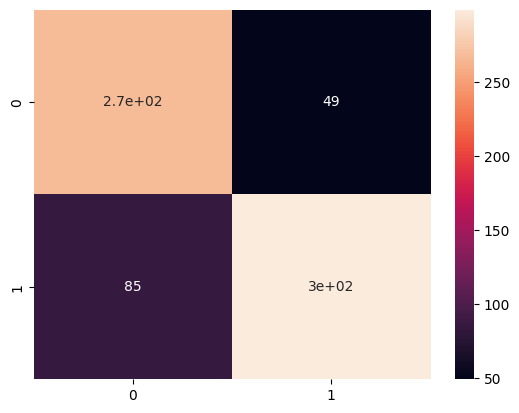

In [65]:
y_pred = classifier.predict(X_test_vec)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")

In [96]:
test = ["Ce film est très mauvais"]

In [124]:
class clean:
    @staticmethod
    def nettoyage(sentance):
        test_list = []
        for i in range(0, len(sentance)):
            words = nltk.word_tokenize(str(sentance))
            words = [word for word in words if word.isalnum()]
            WordSet = []
            for word in words:
                if word not in set(stopwords.words("french")):
                    WordSet.append(word)
            WordSetStem = []
            for word in WordSet:
                WordSetStem.append(stemmer.stem(word))
            WordSetLem = []
            for word in WordSetStem:
                words = WordSetLem.append(lm.lemmatize(word))
            message = ' '.join(WordSetLem)
            test_list.append(message)
            return test_list

In [98]:
test_vec = tfidf.transform(test_list)
# test_w2v = word2vec_features(test_list, model)
classifier.predict(test_vec)

array([0], dtype=int64)

In [99]:
import joblib

In [128]:
joblib.dump(value=[classifier,tfidf], filename='review_allocine.pkl')

['review_allocine.pkl']

In [126]:
model_load = joblib.load(filename='review_allocine.pkl')

In [127]:
model_load

[LGBMClassifier(), TfidfVectorizer(ngram_range=(1, 3)), __main__.clean]

In [117]:
model_load[nettoyage]("Ceci est un test")

TypeError: list indices must be integers or slices, not function